Import Modules

In [59]:
import requests
import json
import time
import itertools
import os
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import pickle

Data Analysis

Total Examples: 2599


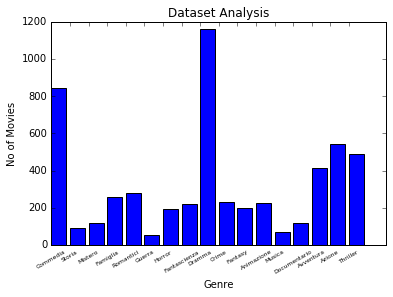

In [60]:
with open('newdata.json') as f:
    data = json.load(f)

si = len(data)
print("Total Examples: {}".format(si));

fre = {}

for i in range(si):
	#url = data[i]["poster_movie_url"]
	for key in data[i]:
		if(data[i][key]==1):
			if(key not in fre):
				fre[key]=1
			else:
				fre[key]+=1

label = []
no_movies = []

for key in fre:
	label.append(key)
	no_movies.append(fre[key])


index = np.arange(len(label))
plt.bar(index, no_movies)
plt.xlabel('Genre', fontsize=10)
plt.ylabel('No of Movies', fontsize=10)
plt.xticks(index, label, fontsize=6, rotation=30)
plt.title('Dataset Analysis')
plt.show()


In [61]:
#To create a map between genre id of each genre and name of the genre
GenreIDToName={}
genreNameBuild = ['Crime', 'Dramma', 'Thriller', 'Musica', 'Fantasy', 'Fantascienza','Animazione', 'Horror', 
'Commedia', 'Avventura', 'Romantici', 'Documentario', 'Famiglia', 'Mistero', 'Storia', 'Azione', 'Guerra']
genreNameBuild.sort()
for i in range(len(genreNameBuild)):
	GenreIDToName[i]=genreNameBuild[i]
print(genreNameBuild)

['Animazione', 'Avventura', 'Azione', 'Commedia', 'Crime', 'Documentario', 'Dramma', 'Famiglia', 'Fantascienza', 'Fantasy', 'Guerra', 'Horror', 'Mistero', 'Musica', 'Romantici', 'Storia', 'Thriller']


Output Vector in terms of binary multilabel representation

In [62]:
genres=[]
allIds=[]
for i in range(len(data)):
    temp = []
    j=0
    for genre in label :
        if(data[i][genre]==1):
            temp.append(j)
        j+=1
    genres.append(temp)
    allIds.extend(temp)
    
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genres)
print(Y[0])
print mlb.classes_
print Y.shape
print len(label)
        

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
(2599, 17)
17


Input Vector for Movie posters

In [63]:
import pickle
import os
import cv2

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
#from PIL import Image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pickle
model = VGG16(weights='imagenet', include_top=False)


In [64]:
print("hello")

featureList=[]
genreList=[]
fileOrder=[]
finalMoviesSet=[]
print "Started extracting features for poster_images."
print "Total images = ",len(data)

posterFolder='poster_images/'

for i in range(len(data)):
    url = data[i]["poster_movie_url"]
    url = url.split('/')
    path = url[-1]
    path = posterFolder + path
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    fileOrder.append(path)
    featureList.append(features)
    temp = []
    j=0
    for genre in label :
        if(data[i][genre]==1):
            temp.append(j)
        j+=1
    genreList.append(temp)
    if np.max(np.asarray(featureList))==0.0:
        print('problematic',i)
    if i>1:
        print "Working on Image : ",i
"Done Succesfully"

hello
Started extracting features for poster_images.
Total images =  2599
Working on Image :  2
Working on Image :  3
Working on Image :  4
Working on Image :  5
Working on Image :  6
Working on Image :  7
Working on Image :  8
Working on Image :  9
Working on Image :  10
Working on Image :  11
Working on Image :  12
Working on Image :  13
Working on Image :  14
Working on Image :  15
Working on Image :  16
Working on Image :  17
Working on Image :  18
Working on Image :  19
Working on Image :  20
Working on Image :  21
Working on Image :  22
Working on Image :  23
Working on Image :  24
Working on Image :  25
Working on Image :  26
Working on Image :  27
Working on Image :  28
Working on Image :  29
Working on Image :  30
Working on Image :  31
Working on Image :  32
Working on Image :  33
Working on Image :  34
Working on Image :  35
Working on Image :  36
Working on Image :  37
Working on Image :  38
Working on Image :  39
Working on Image :  40
Working on Image :  41
Working on Ima

Working on Image :  345
Working on Image :  346
Working on Image :  347
Working on Image :  348
Working on Image :  349
Working on Image :  350
Working on Image :  351
Working on Image :  352
Working on Image :  353
Working on Image :  354
Working on Image :  355
Working on Image :  356
Working on Image :  357
Working on Image :  358
Working on Image :  359
Working on Image :  360
Working on Image :  361
Working on Image :  362
Working on Image :  363
Working on Image :  364
Working on Image :  365
Working on Image :  366
Working on Image :  367
Working on Image :  368
Working on Image :  369
Working on Image :  370
Working on Image :  371
Working on Image :  372
Working on Image :  373
Working on Image :  374
Working on Image :  375
Working on Image :  376
Working on Image :  377
Working on Image :  378
Working on Image :  379
Working on Image :  380
Working on Image :  381
Working on Image :  382
Working on Image :  383
Working on Image :  384
Working on Image :  385
Working on Image

Working on Image :  687
Working on Image :  688
Working on Image :  689
Working on Image :  690
Working on Image :  691
Working on Image :  692
Working on Image :  693
Working on Image :  694
Working on Image :  695
Working on Image :  696
Working on Image :  697
Working on Image :  698
Working on Image :  699
Working on Image :  700
Working on Image :  701
Working on Image :  702
Working on Image :  703
Working on Image :  704
Working on Image :  705
Working on Image :  706
Working on Image :  707
Working on Image :  708
Working on Image :  709
Working on Image :  710
Working on Image :  711
Working on Image :  712
Working on Image :  713
Working on Image :  714
Working on Image :  715
Working on Image :  716
Working on Image :  717
Working on Image :  718
Working on Image :  719
Working on Image :  720
Working on Image :  721
Working on Image :  722
Working on Image :  723
Working on Image :  724
Working on Image :  725
Working on Image :  726
Working on Image :  727
Working on Image

Working on Image :  1028
Working on Image :  1029
Working on Image :  1030
Working on Image :  1031
Working on Image :  1032
Working on Image :  1033
Working on Image :  1034
Working on Image :  1035
Working on Image :  1036
Working on Image :  1037
Working on Image :  1038
Working on Image :  1039
Working on Image :  1040
Working on Image :  1041
Working on Image :  1042
Working on Image :  1043
Working on Image :  1044
Working on Image :  1045
Working on Image :  1046
Working on Image :  1047
Working on Image :  1048
Working on Image :  1049
Working on Image :  1050
Working on Image :  1051
Working on Image :  1052
Working on Image :  1053
Working on Image :  1054
Working on Image :  1055
Working on Image :  1056
Working on Image :  1057
Working on Image :  1058
Working on Image :  1059
Working on Image :  1060
Working on Image :  1061
Working on Image :  1062
Working on Image :  1063
Working on Image :  1064
Working on Image :  1065
Working on Image :  1066
Working on Image :  1067


Working on Image :  1356
Working on Image :  1357
Working on Image :  1358
Working on Image :  1359
Working on Image :  1360
Working on Image :  1361
Working on Image :  1362
Working on Image :  1363
Working on Image :  1364
Working on Image :  1365
Working on Image :  1366
Working on Image :  1367
Working on Image :  1368
Working on Image :  1369
Working on Image :  1370
Working on Image :  1371
Working on Image :  1372
Working on Image :  1373
Working on Image :  1374
Working on Image :  1375
Working on Image :  1376
Working on Image :  1377
Working on Image :  1378
Working on Image :  1379
Working on Image :  1380
Working on Image :  1381
Working on Image :  1382
Working on Image :  1383
Working on Image :  1384
Working on Image :  1385
Working on Image :  1386
Working on Image :  1387
Working on Image :  1388
Working on Image :  1389
Working on Image :  1390
Working on Image :  1391
Working on Image :  1392
Working on Image :  1393
Working on Image :  1394
Working on Image :  1395


Working on Image :  1684
Working on Image :  1685
Working on Image :  1686
Working on Image :  1687
Working on Image :  1688
Working on Image :  1689
Working on Image :  1690
Working on Image :  1691
Working on Image :  1692
Working on Image :  1693
Working on Image :  1694
Working on Image :  1695
Working on Image :  1696
Working on Image :  1697
Working on Image :  1698
Working on Image :  1699
Working on Image :  1700
Working on Image :  1701
Working on Image :  1702
Working on Image :  1703
Working on Image :  1704
Working on Image :  1705
Working on Image :  1706
Working on Image :  1707
Working on Image :  1708
Working on Image :  1709
Working on Image :  1710
Working on Image :  1711
Working on Image :  1712
Working on Image :  1713
Working on Image :  1714
Working on Image :  1715
Working on Image :  1716
Working on Image :  1717
Working on Image :  1718
Working on Image :  1719
Working on Image :  1720
Working on Image :  1721
Working on Image :  1722
Working on Image :  1723


Working on Image :  2012
Working on Image :  2013
Working on Image :  2014
Working on Image :  2015
Working on Image :  2016
Working on Image :  2017
Working on Image :  2018
Working on Image :  2019
Working on Image :  2020
Working on Image :  2021
Working on Image :  2022
Working on Image :  2023
Working on Image :  2024
Working on Image :  2025
Working on Image :  2026
Working on Image :  2027
Working on Image :  2028
Working on Image :  2029
Working on Image :  2030
Working on Image :  2031
Working on Image :  2032
Working on Image :  2033
Working on Image :  2034
Working on Image :  2035
Working on Image :  2036
Working on Image :  2037
Working on Image :  2038
Working on Image :  2039
Working on Image :  2040
Working on Image :  2041
Working on Image :  2042
Working on Image :  2043
Working on Image :  2044
Working on Image :  2045
Working on Image :  2046
Working on Image :  2047
Working on Image :  2048
Working on Image :  2049
Working on Image :  2050
Working on Image :  2051


Working on Image :  2340
Working on Image :  2341
Working on Image :  2342
Working on Image :  2343
Working on Image :  2344
Working on Image :  2345
Working on Image :  2346
Working on Image :  2347
Working on Image :  2348
Working on Image :  2349
Working on Image :  2350
Working on Image :  2351
Working on Image :  2352
Working on Image :  2353
Working on Image :  2354
Working on Image :  2355
Working on Image :  2356
Working on Image :  2357
Working on Image :  2358
Working on Image :  2359
Working on Image :  2360
Working on Image :  2361
Working on Image :  2362
Working on Image :  2363
Working on Image :  2364
Working on Image :  2365
Working on Image :  2366
Working on Image :  2367
Working on Image :  2368
Working on Image :  2369
Working on Image :  2370
Working on Image :  2371
Working on Image :  2372
Working on Image :  2373
Working on Image :  2374
Working on Image :  2375
Working on Image :  2376
Working on Image :  2377
Working on Image :  2378
Working on Image :  2379


'Done Succesfully'

In [101]:
print(len(featureList))
print(len(genre))
'''listPickled=(featureList,fileOrder,genreList)
f=open('posters_new_features.pckl','wb')
pickle.dump(list_pickled,f)
f.close()
'''
(a,b,c,d)=featureList[0].shape
featureSize=a*b*c*d
print featureSize

2599
8
8192


In [102]:
npFeatures=np.zeros((len(featureList),featureSize))
for i in range(len(featureList)):
    feat=featureList[i]
    reshapedFeat=feat.reshape(1,-1)
    npFeatures[i]=reshapedFeat
    
X=npFeatures
print(X.shape)


(2599, 8192)


In [103]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genreList)
Y.shape
visualProblemData=(X,Y)

In [104]:
#Again, dividing data into test set and train set
mask = np.random.rand(len(X)) < 0.8
XTrain=X[mask]
XTest=X[~mask]
YTrain=Y[mask]
YTest=Y[~mask]
XTest.shape

(515, 8192)

In [182]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
modelVisual = Sequential([
    Dense(1024, input_shape=(8192,)),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(17),
    Activation('softmax'),
])
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)

#sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.4, nesterov=False)
modelVisual.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [183]:
modelVisual.fit(XTrain, YTrain, epochs=10, batch_size=64,verbose=1)

Epoch 1/10
2084/2084 [==============================] - 6s 3ms/step - loss: 1.9184 - acc: 0.8589
Epoch 2/10
2084/2084 [==============================] - 6s 3ms/step - loss: 1.5075 - acc: 0.8701
Epoch 3/10
2084/2084 [==============================] - 6s 3ms/step - loss: 1.1390 - acc: 0.8937
Epoch 4/10
2084/2084 [==============================] - 6s 3ms/step - loss: 0.9219 - acc: 0.9086
Epoch 5/10
2084/2084 [==============================] - 6s 3ms/step - loss: 0.7449 - acc: 0.9157
Epoch 6/10
2084/2084 [==============================] - 6s 3ms/step - loss: 0.5822 - acc: 0.9200
Epoch 7/10
2084/2084 [==============================] - 6s 3ms/step - loss: 0.4353 - acc: 0.9193
Epoch 8/10
2084/2084 [==============================] - 6s 3ms/step - loss: 0.3243 - acc: 0.9211
Epoch 9/10
2084/2084 [==============================] - 6s 3ms/step - loss: 0.2591 - acc: 0.9234
Epoch 10/10
2084/2084 [==============================] - 6s 3ms/step - loss: 0.2337 - acc: 0.9254


In [184]:
YPreds=modelVisual.predict(XTest)
print(YPreds)

[[1.1792429e-01 3.1550683e-03 3.9427873e-02 ... 1.0582622e-01
  1.3357150e-02 4.5229125e-04]
 [1.4071049e-01 5.9704580e-06 9.6599841e-05 ... 4.0651423e-01
  1.1319697e-01 7.9434831e-06]
 [4.4903759e-02 1.9139162e-03 2.5384050e-04 ... 4.8382249e-02
  8.9708278e-03 1.0961429e-01]
 ...
 [2.5185415e-01 1.0305578e-02 2.7269986e-02 ... 8.8377543e-02
  1.3277012e-01 1.3768474e-02]
 [1.6558630e-02 2.8750382e-04 6.4347332e-05 ... 1.6911751e-01
  5.5317360e-01 7.9299076e-05]
 [9.0845540e-02 1.0824149e-03 1.0733458e-04 ... 9.7444616e-02
  5.0364070e-02 8.0306813e-02]]


In [185]:
YPreds[0]

array([1.1792429e-01, 3.1550683e-03, 3.9427873e-02, 1.4545195e-03,
       4.5527689e-02, 7.3678282e-05, 4.5692908e-05, 1.7570675e-04,
       5.6381851e-01, 1.2409657e-02, 9.1993753e-03, 8.5159853e-02,
       1.1343913e-03, 8.5806428e-04, 1.0582622e-01, 1.3357150e-02,
       4.5229125e-04], dtype=float32)

In [186]:

(sum(YPreds[0]))

1.0000000340478437

In [187]:
print(YPreds[2],YTest[2])
    

(array([4.4903759e-02, 1.9139162e-03, 2.5384050e-04, 7.7695520e-05,
       8.7970488e-02, 5.3894031e-01, 4.8958347e-03, 1.4146101e-01,
       1.0264303e-02, 2.0322108e-04, 1.6378220e-04, 3.1525815e-05,
       8.9666533e-04, 1.0562278e-03, 4.8382249e-02, 8.9708278e-03,
       1.0961429e-01], dtype=float32), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))


In [188]:
def precision_recall(gt,preds):
    TP=0
    FP=0
    FN=0
    for t in gt:
        if t in preds:
            TP+=1
        else:
            FN+=1
    for p in preds:
        if p not in gt:
            FP+=1
    if TP+FP==0:
        precision=0
    else:
        precision=TP/float(TP+FP)
    if TP+FN==0:
        recall=0
    else:
        recall=TP/float(TP+FN)
    return precision,recall

In [203]:
precs=[]
recs=[]
for i in range(len(YPreds)):
    row=YPreds[i]
    gtGenres=YTest[i]
    gtGenreNames=[]
    for j in range(17):
        if gtGenres[j]==1:
            gtGenreNames.append(GenreIDToName[j])
    threshold = 1.1e-1
    top = []
    for z in range(len(row)):
        if(row[z]>=threshold):
            top.append(z)
    predictedGenres=[]
    for genre in top:
        predictedGenres.append(GenreIDToName[genre])
    (precision,recall)=precision_recall(gtGenreNames,predictedGenres)
    precs.append(precision)
    recs.append(recall)
    if i%20==0:
        print "Predicted:",','.join(predictedGenres)," |      Actual:",','.join(gtGenreNames)
        
print "Mean precision = ", np.mean(np.asarray(precs)),"," ,"Mean Recalls = ", np.mean(np.asarray(recs))
p_1 = np.mean(np.asarray(precs))
r_1 = np.mean(np.asarray(recs))
score_f = (2*p_1*r_1)/(p_1+r_1)
print("F1 Score :{}".format(score_f))

Predicted: Animazione,Fantascienza  |      Actual: Animazione,Crime
Predicted: Fantascienza  |      Actual: Fantascienza,Storia
Predicted: Animazione,Storia  |      Actual: Animazione
Predicted: Animazione,Fantascienza  |      Actual: Animazione,Crime,Fantascienza
Predicted: Fantascienza,Fantasy,Thriller  |      Actual: Fantascienza,Fantasy
Predicted: Fantascienza,Storia  |      Actual: Famiglia,Romantici,Storia
Predicted: Romantici,Thriller  |      Actual: Fantascienza
Predicted: Animazione,Fantascienza  |      Actual: Animazione
Predicted: Crime,Dramma,Fantascienza  |      Actual: Animazione,Crime
Predicted: Animazione  |      Actual: Animazione
Predicted: Famiglia,Thriller  |      Actual: Animazione,Dramma
Predicted: Storia  |      Actual: Dramma,Famiglia,Storia
Predicted: Animazione,Documentario,Fantascienza  |      Actual: Fantascienza
Predicted: Animazione,Crime,Fantascienza,Fantasy  |      Actual: Famiglia,Romantici,Storia
Predicted: Fantascienza  |      Actual: Thriller
Predict